We use elastic net regression when we don't know which regularization to apply in a large dataset

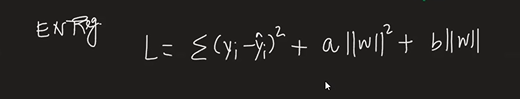

# 📘 Elastic Net Regression

Elastic Net is a **regularized regression** technique that combines **L1 (Lasso)** and **L2 (Ridge)** penalties. It addresses the limitations of both methods when applied independently.

---

## 🧠 Motivation

- **Lasso** (L1) promotes sparsity but can behave erratically when features are highly correlated.
- **Ridge** (L2) handles multicollinearity well but does not produce sparse models.
- **Elastic Net** merges the strengths of both:
  - Feature selection (like Lasso)
  - Stability with correlated features (like Ridge)

---

## 🔢 Loss Function

The cost function minimized by Elastic Net is:

$$
J(\theta) = \sum_{i=1}^{n} \left( y^{(i)} - \theta^T x^{(i)} \right)^2 + \lambda_1 \sum_{j=1}^{p} |\theta_j| + \lambda_2 \sum_{j=1}^{p} \theta_j^2
$$

Alternatively, using a mixing parameter $\\alpha$ and a single regularization strength $\\lambda$:

$$
J(\theta) = \text{RSS} + \lambda \left( \alpha \sum_{j=1}^{p} |\theta_j| + (1 - \alpha) \sum_{j=1}^{p} \theta_j^2 \right)
$$

- $\\alpha \in [0, 1]$ controls the mix between Lasso and Ridge:
  - $\\alpha = 1$ → pure Lasso
  - $\\alpha = 0$ → pure Ridge
- $\\lambda$ controls overall regularization strength.

---

## 🧩 Intuition

- **L1 part**: encourages coefficients to be zero → sparsity
- **L2 part**: discourages large coefficients → stability
- Elastic Net balances **variable selection** and **shrinkage**

---

## 🧪 When to Use

- You have **many features** (especially more than observations)
- Your features are **highly correlated**
- You want both **sparse** and **stable** models

---

## ✅ Advantages

- Combines **feature selection** with **regularization**
- Works well when:
  - Number of features > number of samples
  - Predictors are **correlated**
- More robust than Lasso when features are correlated

---

## ❌ Disadvantages

- Adds an extra hyperparameter $\\alpha$
- Requires **tuning both $\\alpha$ and $\\lambda$** using cross-validation

---

## 📦 In scikit-learn

```python
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # l1_ratio = α
model.fit(X_train, y_train)


In [1]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
X,y = load_diabetes(return_X_y=True)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [4]:
# Linear Regression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [5]:
# Ridge 
reg = Ridge(alpha=0.1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.45199494197195456

In [6]:
# Lasso
reg = Lasso(alpha=0.01)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.44111855963110613

In [12]:
# ElasticNet
reg = ElasticNet(alpha=0.005,l1_ratio=0.9)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4531474541554823